# Solow-Swan Growth Model
Let us start the lecture by taking a look at the differences in GDP per capita across countries. Throughout this lecture we will use the data from the latest 10 version of the [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en) database.

In [182]:
# Import numerical computations library
import numpy as np

# Import dataframe management library
import pandas as pd

# Import statistics library
import statsmodels.api as sm

# Import statistics library, allows R-like regression syntax
import statsmodels.formula.api as smf

# Import plotting library
import matplotlib.pyplot as plt

In [183]:
# Restore old behavior of rounding default axis ranges
import matplotlib as mpl

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [184]:
# Read dataset
pwt = pd.read_stata('data/pwt100.dta')

# Display last 5 observations
pwt.tail()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120
12809,ZWE,Zimbabwe,US Dollar,2019,42296.062500,40826.570312,14.645468,6.831017,NaN,2.713408,...,0.213562,-0.270959,-0.089798,0.494755,0.652439,0.500927,0.487763,0.430082,0.420675,1.384068


We will be using (among others) the following time series from the PWT dataset:

* **rgdpe** - Expenditure-side real GDP at chained PPPs (in mil. 2017US\$): to compare relative living standards across countries and over time
* **rgdpo** - Output-side real GDP at chained PPPs (in mil. 2017US\$): to compare relative productive capacity across countries and over time
* **pop** - Population (in millions)
* **emp** - Number of persons engaged (in millions)
* **hc** - Human capital index, based on years of schooling and returns to education
* **csh_i** - Share of gross capital formation at current PPPs
The description of other variables can be found in the Legend sheet of the PWT excel file:
https://www.rug.nl/ggdc/docs/pwt91.xlsx

In [185]:
# Observations for given year, show first 5
pwt[pwt['year']==2010].head(5)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
60,ABW,Aruba,Aruban Guilder,2010,4012.711670,3933.467773,0.101669,0.046500,NaN,NaN,...,0.705986,-0.918676,6.078640e-03,0.732815,0.452776,0.643131,0.639149,0.589527,0.346565,0.340283
130,AGO,Angola,Kwanza,2010,140742.281250,159625.234375,23.356246,11.977833,NaN,1.417133,...,0.648454,-0.170013,-2.239611e-01,0.677508,0.497219,0.636309,0.509237,0.612004,0.334951,0.424363
200,AIA,Anguilla,East Caribbean Dollar,2010,408.891510,381.682800,0.013438,NaN,NaN,NaN,...,0.557616,-1.056281,-2.123148e-16,0.741067,0.485195,0.600048,0.682445,0.527267,0.354686,NaN
270,ALB,Albania,Lek,2010,29490.845703,31021.064453,2.948023,0.890818,NaN,2.904078,...,0.085711,-0.292642,6.020573e-02,0.453864,0.434250,0.203403,0.585903,0.509596,0.329034,NaN
340,ARE,United Arab Emirates,UAE Dirham,2010,565722.187500,618895.250000,8.549988,5.272982,NaN,2.717433,...,0.595149,-0.506905,1.474093e-01,0.559105,0.409519,0.645025,0.557755,0.598626,0.338136,NaN


In [186]:
# Sample 10 observations for given year
pwt[pwt['year']==2010].sample(n=10)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
7760,MKD,North Macedonia,Denar,2010,2.522985e+04,2.623413e+04,2.070741,0.684335,NaN,NaN,...,0.236960,-0.398001,1.096643e-06,0.422407,0.395544,0.244561,0.617963,0.537146,0.273990,0.412042
11120,SYR,Syrian Arab Republic,Syrian Pound,2010,1.325330e+05,1.326270e+05,21.362529,5.263532,NaN,2.387017,...,0.038798,-0.059388,2.824694e-02,0.513131,0.959026,0.195165,0.557515,0.563406,0.320731,NaN
10350,SLE,Sierra Leone,Leone,2010,7.551625e+03,8.106587e+03,6.415634,2.103103,NaN,1.506676,...,0.082717,-0.200095,-1.298800e-10,0.337116,0.387826,0.250945,0.652554,0.553851,0.223686,0.500179
11680,TUN,Tunisia,Tunisian Dinar,2010,1.228589e+05,1.278790e+05,10.635244,3.574775,NaN,2.217884,...,0.208947,-0.312236,7.986228e-02,0.403100,0.337061,0.277607,0.625589,0.566175,0.207785,0.445926
3280,DEU,Germany,Euro,2010,3.531824e+06,3.672402e+06,80.827002,40.631882,1425.745469,3.653333,...,0.590327,-0.520537,1.371062e-16,0.949334,0.880583,1.079853,0.677822,0.673666,0.878384,0.885713
9930,RUS,Russian Federation,Russian Ruble,2010,3.404144e+06,3.468686e+06,143.479274,70.372368,1976.000000,3.298080,...,0.214266,-0.103747,-3.758681e-02,0.453720,0.704964,0.317993,0.550270,0.655540,0.634376,0.416356
4540,GIN,Guinea,Guinea Franc,2010,1.925262e+04,2.060048e+04,10.192176,3.632624,NaN,NaN,...,0.177036,-0.257369,8.239338e-10,0.343581,0.539392,0.272574,0.584913,0.572929,0.347870,1.214858
1600,BMU,Bermuda,Bermudian Dollar,2010,5.056117e+03,4.458850e+03,0.065389,0.036411,NaN,NaN,...,0.181618,-0.374197,3.324034e-01,1.416210,0.949881,1.436684,0.645120,0.595501,0.743878,1.622011
4470,GHA,Ghana,Cedi,2010,1.058562e+05,1.081347e+05,24.779619,10.339512,NaN,2.259152,...,0.075719,-0.132355,-2.688907e-02,0.398243,0.442951,0.293476,0.638675,0.562527,0.234596,NaN
2300,CHL,Chile,Chilean Peso,2010,3.527896e+05,3.421959e+05,17.062536,6.889198,2070.000000,2.978771,...,0.318270,-0.307582,9.819462e-03,0.638332,0.601301,0.541554,0.657862,0.566807,0.463569,1.475343


In [187]:
# Observations for given country, show last 10
pwt[pwt['country']=='Poland'].tail(10)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
9510,POL,Poland,Zloty,2010,9.040329e+05,8.979934e+05,38.329781,15.326408,2048.800023,3.230425,...,0.270405,-0.327436,0.013719,0.539490,0.634034,0.439693,0.659209,0.603338,0.519680,1.089440
9511,POL,Poland,Zloty,2011,9.639614e+05,9.613096e+05,38.286831,15.387612,2043.599982,3.254020,...,0.285158,-0.350376,0.018123,0.544442,0.681307,0.444981,0.699769,0.633133,0.537765,1.155988
9512,POL,Poland,Zloty,2012,9.859019e+05,9.805592e+05,38.227044,15.381113,2038.399990,3.278011,...,0.277870,-0.329001,0.014442,0.504072,0.608169,0.432327,0.678189,0.607794,0.489430,1.030587
9513,POL,Poland,Zloty,2013,9.921968e+05,9.774459e+05,38.158041,15.351600,2034.754588,3.302406,...,0.305457,-0.342292,0.018249,0.527905,0.625852,0.453455,0.699369,0.630228,0.488319,1.027026
9514,POL,Poland,Zloty,2014,1.002208e+06,9.882622e+05,38.091089,15.601132,2041.321912,3.327214,...,0.310931,-0.349969,0.015219,0.547834,0.628913,0.460265,0.712667,0.642046,0.483178,1.015275
9515,POL,Poland,Zloty,2015,1.069768e+06,1.033508e+06,38.034079,15.824997,2049.009142,3.352443,...,0.291449,-0.316534,0.017589,0.456946,0.516399,0.373115,0.649805,0.583649,0.397493,0.849334
9516,POL,Poland,Zloty,2016,1.098284e+06,1.055274e+06,37.989220,15.941554,2051.479344,3.378103,...,0.289051,-0.306327,0.020895,0.440781,0.499729,0.359193,0.644594,0.583667,0.377628,0.757988
9517,POL,Poland,Zloty,2017,1.141621e+06,1.102457e+06,37.953180,16.137400,2029.358259,3.404202,...,0.304264,-0.332127,0.031353,0.478041,0.506532,0.378749,0.659758,0.595318,0.402531,0.808224
9518,POL,Poland,Zloty,2018,1.194454e+06,1.157452e+06,37.921592,16.211662,2002.151466,3.430751,...,0.326100,-0.365864,0.040645,0.508894,0.538818,0.406631,0.693246,0.631791,0.431056,0.807684
9519,POL,Poland,Zloty,2019,1.259694e+06,1.211846e+06,37.887768,16.159107,2022.632232,3.457758,...,0.303541,-0.328660,0.038322,0.489376,0.523544,0.392328,0.683009,0.617757,0.420247,0.786552


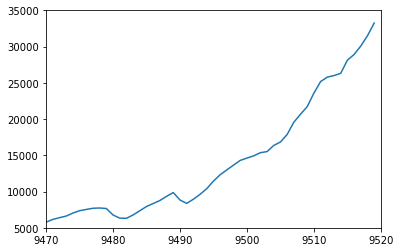

In [188]:
# Plot real GDP per capita series for Poland, note x-axis behavior
(pwt[pwt['country']=='Poland']['rgdpe'] / 
 pwt[pwt['country']=='Poland']['pop']).plot()
plt.show()

In [189]:
# Modify the dataset so that it is easier to work with

# Store country names and codes for later use
countries = pwt['country']
countries = countries.drop_duplicates()

countrycodes = pwt['countrycode']
countrycodes = countrycodes.drop_duplicates()

# Set MultiIndex (Index becomes country&year couple)
pwt.set_index(['country', 'year'], inplace=True)
pwt.tail(5)

countrycode currency_unit         rgdpe         rgdpo  \
country  year                                                         
Zimbabwe 2015         ZWE     US Dollar  40141.617188  39798.644531   
         2016         ZWE     US Dollar  41875.203125  40963.191406   
         2017         ZWE     US Dollar  44672.175781  44316.742188   
         2018         ZWE     US Dollar  44325.109375  43420.898438   
         2019         ZWE     US Dollar  42296.062500  40826.570312   

                     pop       emp  avh        hc          ccon           cda  \
country  year                                                                   
Zimbabwe 2015  13.814629  6.393752  NaN  2.584653  44249.355469  47325.460938   
         2016  14.030331  6.504374  NaN  2.616257  43291.566406  46404.160156   
         2017  14.236595  6.611773  NaN  2.648248  46113.945312  49457.570312   
         2018  14.438802  6.714952  NaN  2.680630  46198.441406  49665.386719   
         2019  14.645468  6.831017  NaN  2.713408  43961.839844  47128.785156   

               ...     csh_x     csh_m     csh_r      pl_c      pl_i  \
country  year  ...                                                     
Zimbabwe 2015  ...  0.140172 -0.287693 -0.051930  0.479228  0.651287   
         2016  ...  0.131920 -0.251232 -0.016258  0.470640  0.651027   
         2017  ...  0.126722 -0.202827 -0.039897  0.473560  0.639560   
         2018  ...  0.144485 -0.263658 -0.020791  0.543757  0.655473   
         2019  ...  0.213562 -0.270959 -0.089798  0.494755  0.652439   

                   pl_g      pl_x      pl_m      pl_n      pl_k  
country  year                                                    
Zimbabwe 2015  0.541446  0.616689  0.533235  0.422764  1.533909  
         2016  0.539631  0.619789  0.519718  0.416510  1.491724  
         2017  0.519956  0.619739  0.552042  0.415592  1.514525  
         2018  0.529867  0.641361  0.561526  0.425143  1.590120  
         2019  0.500927  0.487763  0.430082  0.420675  1.384068  

[5 rows x 50 columns]

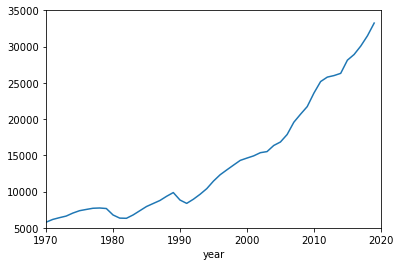

In [190]:
# Again plot real GDP per capita series for Poland, note x-axis behavior
(pwt.loc['Poland']['rgdpe'] / pwt.loc['Poland']['pop']).plot()
plt.show()

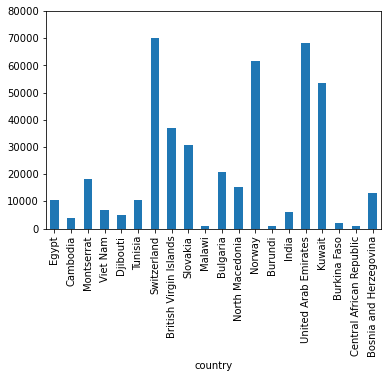

In [191]:
# Plot GDP per capita in 2017 for random 20 countries
(pwt.xs(2017, level='year')['rgdpe'] / 
 pwt.xs(2017, level='year')['pop']).sample(20, random_state=1).plot.bar()
plt.show()

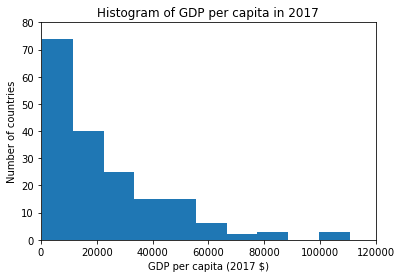

In [192]:
# Extract data for GDP per capita in 2017
gdp_pc_2017 = (pwt.xs(2017, level='year')['rgdpe']/
               pwt.xs(2017, level='year')['pop'])

# Plot histogram
plt.hist(gdp_pc_2017)

plt.title('Histogram of GDP per capita in 2017')
plt.xlabel('GDP per capita (2017 \$)')
plt.ylabel('Number of countries')

plt.show()

In [193]:
min_gdp=(round(gdp_pc_2017.min(),2),gdp_pc_2017.idxmin())
min_gdp

(381.16, 'Venezuela (Bolivarian Republic of)')

In [194]:
max_gdp=(round(gdp_pc_2017.max(),2),gdp_pc_2017.idxmax())
max_gdp

(110697.75, 'Luxembourg')

In [195]:
# List countries with very high GDP per capita
highgdp=gdp_pc_2017[gdp_pc_2017 > 55000]

In [196]:
# Listing countries by GDP per capita
highgdp.sort_values(ascending=False)

country
Luxembourg              110697.750450
China, Macao SAR        106291.585687
Qatar                   105430.890716
Ireland                  86224.280649
Singapore                85554.281013
Bermuda                  79337.048677
Switzerland              70058.802214
United Arab Emirates     68235.126833
Cayman Islands           64996.765643
Brunei Darussalam        63592.066479
Norway                   61759.097250
United States            60768.010912
China, Hong Kong SAR     59519.310811
Iceland                  57512.972900
dtype: float64

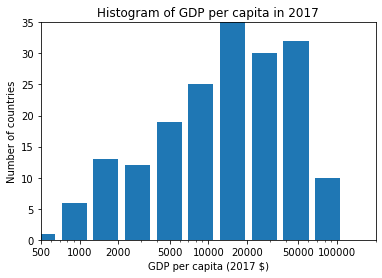

In [197]:
# Data is highly skewed -- maybe better display in logarithms
# np.logspace (start, stop, num=50, endpoint=True, base=10.0, dtype=None
#, axis=0) - Return numbers spaced evenly on a log scale

log_bins_2017 = np.logspace(np.log(np.min(gdp_pc_2017)),
                            np.log(np.max(gdp_pc_2017)),
                            num=1+10, base=np.e)

plt.hist(gdp_pc_2017, bins=log_bins_2017, histtype='bar', rwidth=0.8)

plt.xscale('log')

plt.xlim(500, 200000)

plt.xticks([500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], 
           [500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])

plt.title('Histogram of GDP per capita in 2017')
plt.xlabel('GDP per capita (2017 \$)')
plt.ylabel('Number of countries')

plt.show()

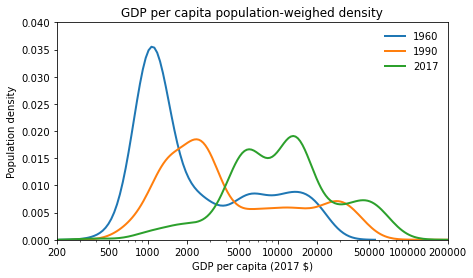

In [198]:
# Plot the population-weighted distribution of GDP per capita in given years

plt.subplots(figsize = (7, 4))

for i, year in enumerate([1960, 1990, 2017]):
    sl = pwt.xs(year, level='year').dropna(subset=['rgdpe','pop'])
    # Dataframe.xs: Return cross-section from the Series/DataFrame. 
    # In our case returns rgdpe and pop by 1960,1997,2017 years.
    # dropna remove missing values
    pop_tot = np.sum(sl['pop'])

    weighted = sm.nonparametric.KDEUnivariate(np.log(sl['rgdpe']/sl['pop']))
# kernel density estimation (KDE) is a non-parametric way to estimate the
# probability density function of a random variable. (Log of GDP per capita in our case)    
    weighted.fit(bw=0.3, fft=False, weights=sl['pop'])
    plt.plot(np.exp(weighted.support), 
             weighted.density/np.sum(weighted.density), 
             lw=2, label='{0}'.format(year))

plt.xscale('log')

plt.xticks([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000], 
           [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000])
    
plt.legend(frameon=False)

plt.xlim(2e2, 2e5)

plt.title('GDP per capita population-weighed density')
plt.xlabel('GDP per capita (2017 \$)')
plt.ylabel('Population density')

plt.show()

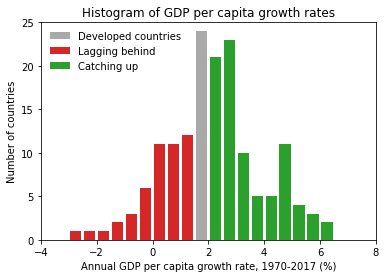

In [199]:
# Plot the histogram of average growth rates

x_70 = pwt.xs(1970, level='year')['rgdpe']/pwt.xs(1970, level='year')['pop']

x_17 = pwt.xs(2017, level='year')['rgdpe']/pwt.xs(2017, level='year')['pop']

# CAGR: Growth per year formula growth=(Value end/Value begin)^(1/t)-1
g = 100*((x_17/x_70)**(1/(2017-1970))-1)

plt.hist(g.dropna(), np.arange(1.5, 2.5, 0.5), histtype='bar', rwidth=0.8, fc='darkgrey', label='Developed countries')
plt.hist(g.dropna(), np.arange(-10, 2, 0.5), histtype='bar', rwidth=0.8, fc='C3', label='Lagging behind')
plt.hist(g.dropna(), np.arange(2, 10, 0.5), histtype='bar', rwidth=0.8, fc='C2', label='Catching up')

plt.xlim(-4, 8)

plt.title('Histogram of GDP per capita growth rates')
plt.xlabel('Annual GDP per capita growth rate, 1970-2017 (%)')
plt.ylabel('Number of countries')

plt.legend(frameon=False)

plt.show()

In [200]:
# Display the name of the countries with the
# lowest and the highest GDP per capita growth between 1970-2017
[round(g.min(),2),g.idxmin(), round(g.max(),2),g.idxmax()]

[-6.62, 'Venezuela (Bolivarian Republic of)', 6.43, 'Republic of Korea']

## We want to explain the following set of facts:

* There is high dispersion in GDP per capita across countries
* The developed countries keep growing
* Some (but not all) developing countries (notably China and India) are catching up to the developed countries

## Solow-Swan Model

Authors: [Robert Solow (1956)](https://academic.oup.com/qje/article-abstract/70/1/65/1903777) and [Trevor Swan (1956)](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1475-4932.1956.tb00434.x)

Assumptions and simplifications:

* One sector economy: produces a single good that can be either consumed or invested
* Complete information, no externalities
* Markets for the final good and factors of production are perfectly competitive
* Closed economy and no government
* Two types of representative agents: firms and households
* Firms optimize, while households do not (save a fixed fraction of their income)
* Households own capital and labor and rent them to the firms
* Output is produced according to a neoclassical production function


A consequence of the closed economy and no government assumption is that private savings are equal to private investment. This is an accounting identity and says nothing about any causal relationships between savings and investment.

Start from the national accounting identity and assume no government ($G=0$ ) and no international trade ($NX=0$):
$$ Y=C+I+\underbrace{G}_{0}+\underbrace{NX}_{0} \quad   \rightarrow  \quad Y=C+I$$

Then consider the disposition of households' disposable income  $Y^{d}$  between consumption and savings. If there is no government, taxes  $T=0$  and disposable income is equal to the economy's output:
$$ Y^{d}=C+S \quad \textrm{and} \quad Y^{d}=Y-\underbrace{T}_{0} \quad \rightarrow  \quad Y=C+S$$

Together those two accounting exercises yield the result that savings are equal to investment:
$$ Y=C+I \quad \textrm{and} \quad Y=C+S \quad \rightarrow  \quad I=S$$

### Three core equations

1. Capital accumulation (accounting identity):

$$K_{t+1}=I_{t}+(1-\delta).K_{t}$$


2. Investment / saving decisions: households save a constant fraction  𝑠  of their income (behavioral assumption):

$$ I_{t}=S_{t}=s.Y_{t}$$


3. Output is produced using capital  $K$  and labor  $L$ , using technology $A$, and the production function $F$ is neoclassical (functional restriction):

$$Y_{t}=F(K_{t},L_{t},A_{t})$$


### Neoclassical production function

A production function describes how capital $K$ and labor $L$, using technology $A$, is transformed into output $Y$:

$$ Y=F(K,L,A) $$

A neoclassical production function $F$ has the following properties:

* Continuous and at least twice differentiable


* Constant returns to scale in $K$ and $L$. Multiplying both capital and labor inputs by a certain proportion $z$ translates to multiplying produced output by that same proportion $z$:

$$ F(z.K,z.L,A)=z.F(K,L,A)=z.Y \quad \textrm{for all} \quad z>0$$


* Positive but diminishing marginal products of $K$ and $L$:

\begin{align}
\frac{\partial F \left( K, L, A \right)}{\partial K} \equiv F_{K} \left( K, L, A \right) > 0 \quad &\text{and} \quad 
\frac{\partial^{2} F \left( K, L, A \right)}{\partial K^{2}} \equiv F_{KK} \left( K, L, A \right) < 0 \\
\frac{\partial F \left( K, L, A \right)}{\partial L} \equiv F_{L} \left( K, L, A \right) > 0 \quad &\text{and} \quad 
\frac{\partial^{2} F \left( K, L, A \right)}{\partial L^{2}} \equiv F_{LL} \left( K, L, A \right) < 0
\end{align}


* (Optional) [Inada (1963)](https://www.jstor.org/stable/2295809) conditions:

\begin{align}
\lim_{K \to 0} F_{K} \left( K, L, A \right) = \infty \quad &\text{and} \quad 
\lim_{K \to \infty} F_{K} \left( K, L, A \right) = 0 \quad \text{for all } L > 0 \\
\lim_{L \to 0} F_{L} \left( K, L, A \right) = \infty \quad &\text{and} \quad 
\lim_{L \to \infty} F_{L} \left( K, L, A \right) = 0 \quad \text{for all } K > 0
\end{align}


* (Optional) Necessity of both inputs:

\begin{align}
F \left( 0, L, A \right) = F \left( K, 0, A \right) = 0
\end{align}

### Solow-Swan model with population growth

First let us consider the following case. Population $N$ (and thus labor force $L$) grows at a constant (possibly negative) rate $n$, while technology is constant at a level $\bar{A}$:

\begin{align}
\frac{L_{t+1}}{L_{t}} = \frac{N_{t+1}}{N_{t}} = 1+n
\end{align}

It is very convenient to define output per worker $y$ and capital per worker $k$:

\begin{align}
y_{t} \equiv \frac{Y_{t}}{L_{t}} \quad \text{and} \quad k_{t} \equiv \frac{K_{t}}{L_{t}}
\end{align}

Use the constant returns to scale property of the neoclassical production function:

\begin{align}
y_{t} = \frac{Y_{t}}{L_{t}} = \frac{1}{L_{t}} \cdot F \left( K_{t}, L_{t}, \bar{A} \right) = 
F \left( \frac{1}{L_{t}} \cdot K_{t}, \frac{1}{L_{t}} \cdot L_{t}, \bar{A} \right) = 
F \left( k_{t}, 1, \bar{A} \right) \equiv f \left( k_{t} \right)
\end{align}

where $f$ is called the production function in the intensive (per worker) form.


Recall the fundamental equation of the model:

\begin{align}
K_{t+1} &= I_{t} + \left( 1-\delta \right) K_{t} \\
K_{t+1} &= s.Y_{t} + \left( 1-\delta \right) K_{t} \\
K_{t+1} &= s.F \left( K_{t}, L_{t}, A_{t} \right) + \left( 1-\delta \right) K_{t}
\end{align}

We can now express it in terms of variables per worker:

\begin{align}
K_{t+1} &= s F \left( K_{t}, L_{t}, \bar{A} \right) + \left( 1-\delta \right) K_{t} \qquad | \quad : L_{t} \\
\frac{K_{t+1}}{L_{t}} &= s \frac{F \left( K_{t}, L_{t}, \bar{A} \right)}{L_{t}} 
+ \left( 1-\delta \right) \frac{K_{t}}{L_{t}} \\
\frac{L_{t+1}}{L_{t}} \cdot \frac{K_{t+1}}{L_{t+1}} &= s f \left( k_{t} \right) 
+ \left( 1-\delta \right) k_{t} \\
\left( 1+n \right) k_{t+1}  &= s f \left( k_{t} \right) + \left( 1-\delta \right) k_{t}
\end{align}

Finally, we get an equation that determines next period's level of capital stock per worker as a function of current period's level of capital per worker and model parameters:

\begin{align}
k_{t+1} = \frac{ s f \left( k_{t} \right) + \left( 1-\delta \right) k_{t} }{1+n}
\end{align}

Let us draw an example plot below, assuming that the production function is of the following Cobb-Douglas form:

\begin{align}
F \left( K, L \right) = \bar{A} K^{\alpha} L^{1-\alpha} \quad \to \quad f \left( k \right) = \bar{A} k^{\alpha}
\end{align}

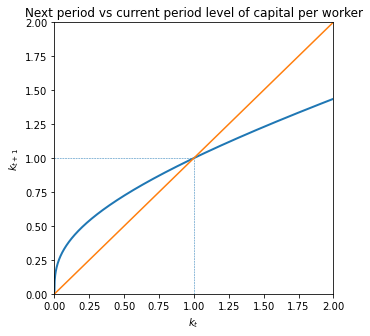


Steady state level of capital per worker = 1.0


In [201]:
# Parameter values (some of them are exaggerated to make the plot easier to read)
A = 1
α = 1/3
δ = 0.75
n = 0.05
s = 0.8

# Production function in intensive form
def f(k):
    return k**α

# Function for k_{t+1}
def k_next(k):
    return ( s*A*f(k) + (1-δ)*k ) / (1+n)

# Plot range
k_star = ((s*A)/(δ+n))**(1/(1-α))
kk = np.linspace(0, 2*k_star, 1000)

# Make "square" plot
plt.subplots(figsize = (5, 5))

# Plot k_{t+1} function as well as k_{t+1}=k_{t} line
plt.plot(kk, k_next(kk), lw=2)
plt.plot(kk, kk)

plt.hlines(k_star, 0, k_star, linestyle='dashed', lw=0.5)
plt.vlines(k_star, 0, k_star, linestyle='dashed', lw=0.5)

plt.title('Next period vs current period level of capital per worker')
plt.xlabel('$k_{t}$')
plt.ylabel('$k_{t+1}$')

plt.show()

print('')
print('Steady state level of capital per worker =', k_star)

From the plot we can easily see that there is a level of $k$ for which the next period and current period level of capital are the same. We will call this level a **steady state** level of capital per worker, and we will denote it with $k^{*}$. The properties of the neoclassical production function guarantee that there is only one, positive level of $k^{*}$.

Let us find the expression for the steady state level of capital per worker under the Cobb-Douglas production function, by setting $k_{t+1} = k_{t} = k^{*}$:

\begin{align}
\left( 1+n \right) k^{*} &= s \bar{A} \left( k^{*} \right)^{\alpha} + \left( 1-\delta \right) k^{*} \\
\left( \delta+n \right) k^{*} &= s \bar{A} \left( k^{*} \right)^{\alpha} \\
\left( k^{*} \right)^{1-\alpha} &= \frac{s \bar{A}}{\delta+n} \\
k^{*} &= \left( \frac{s \bar{A}}{\delta+n} \right)^{1/(1-\alpha)}
\end{align}

We can also obtain the steady state level of output per worker:

\begin{align}
y^{*} = f \left( k^{*} \right) = \bar{A} \left( k^{*} \right)^{\alpha} = 
\bar{A} \left( \frac{s \bar{A}}{\delta+n} \right)^{\alpha/(1-\alpha)}
\end{align}

It is also useful to take a look at the dynamics of capital per worker, to see how a steady state can be reached:

\begin{align}
k_{t+1} &= \frac{ s f \left( k_{t} \right) + \left( 1-\delta \right) k_{t} }{1+n} \qquad | \quad - k_{t} \\
k_{t+1} - k_{t} &= \frac{ s f \left( k_{t} \right) - \left( \delta + n \right) k_{t} }{1+n} \\
\Delta k_{t+1} &= \frac{ s f \left( k_{t} \right) - \left( \delta + n \right) k_{t} }{1+n} \qquad | \quad : k_{t} \\
\frac{\Delta k_{t+1}}{k_{t}} &= \frac{ s f \left( k_{t} \right) / k_{t} - \left( \delta + n \right) }{1+n}
\end{align}

The above formula gives the expression for the rate of growth of capital per worker. Let us plot the result below (again assuming Cobb-Douglas production function).

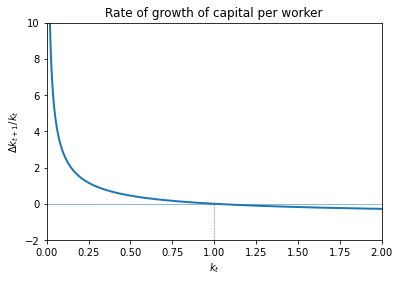

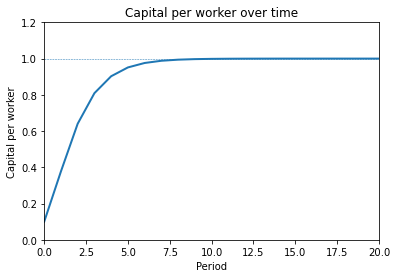

In [202]:
# Plot Δk_{t+1}/k_{t} function
def Δk_k(k):
    return ( s*A*f(k)/k - (δ+n) ) / (1+n)

plt.plot(kk[1:], Δk_k(kk[1:]), lw=2)
plt.hlines(0, 0, 2*k_star, lw=0.5)
plt.vlines(k_star, -2, 0, linestyle='dashed', lw=0.5)

plt.ylim(-2, 10)

plt.title('Rate of growth of capital per worker')
plt.xlabel('$k_{t}$')
plt.ylabel('$\Delta k_{t+1} / k_{t}$')

plt.show()

# Plot k over time, assuming that k_0 < k_ss
T = 1+20
k_t = np.zeros(T)
k_0 = 0.1 * k_star
k_t[0] = k_0

for t in range(T-1):
    k_t[t+1] = k_next(k_t[t])
    
plt.plot(k_t, lw=2)

plt.hlines(k_star, 0, T-1, linestyle='dashed', lw=0.5)

plt.ylim(0, 1.2)

plt.title('Capital per worker over time')
plt.xlabel('Period')
plt.ylabel('Capital per worker')

plt.show()

### Model predictions

Recall the expression for the steady state level of output per worker (assuming Cobb-Douglas production function):

\begin{align}
y^{*} = f \left( k^{*} \right) = \bar{A} \left( k^{*} \right)^{\alpha} = 
\bar{A} \left( \frac{s \bar{A}}{\delta+n} \right)^{\alpha/(1-\alpha)}
\end{align}

As can be easily seen above, the model predicts that:
- countries with high saving / investment rate $s$ and technology level $\bar{A}$ will have higher levels of steady state capital and output per worker
- countries with high depreciation rate $\delta$ and population growth rate $n$ will have lower levels of steady state capital and output per worker

Let us now take a look at the data to see whether the model's predictions are verified.

In [203]:
# Construct average values for investment and population growth rates
s = np.zeros(len(countries))
n = np.zeros(len(countries))
y = np.zeros(len(countries))
N = np.zeros(len(countries))

for i, country in enumerate(countries):
    s[i] = 100*np.mean(pwt.loc[country]['csh_i'])
    n[i] = 100*np.mean(pwt.loc[country]['pop'].pct_change())
    y[i] = pwt.loc[country, 2017]['rgdpo']/pwt.loc[country, 2017]['emp']
    N[i] = pwt.loc[country, 2017]['pop']

d = {'y': y, 's': s, 'n': n, 'N': N}
dta = pd.DataFrame(data=d, index=countries)
dta.head()

,y,s,n,N
country,,,,
Aruba,64917.601562,37.135181,1.220593,0.105366
Angola,14805.916992,35.646155,3.502952,29.816766
Anguilla,NaN,55.800045,1.625213,0.014584
Albania,33788.500000,18.425424,0.607413,2.884169
United Arab Emirates,111266.890625,35.208049,8.042891,9.487203


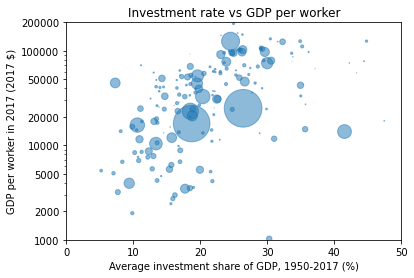

In [204]:
# Investment rate vs GDP per worker
plt.scatter(s, y, s=N, alpha=0.5)

plt.yscale('log')

plt.yticks([1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000],
           [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000])

plt.xlim(0, 50)
plt.ylim(1e3, 2e5)

plt.title('Investment rate vs GDP per worker')
plt.xlabel('Average investment share of GDP, 1950-2017 (%)')
plt.ylabel('GDP per worker in 2017 (2017 \$)')

plt.show()

In [205]:
investment_rate = dta["s"]
gdp_per_worker = dta["y"]
correlation = investment_rate.corr(gdp_per_worker)

print(correlation)

0.5045163102349418


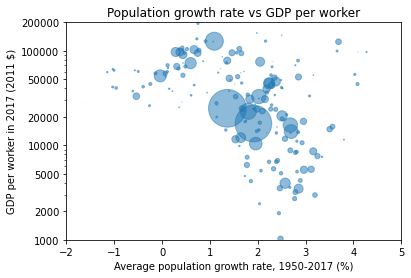

In [206]:
# Population growth rate vs GDP per worker
plt.scatter(n, y, s=N, alpha=0.5)

plt.yscale('log')

plt.yticks([1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000],
           [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000])

plt.xlim(-2, 5)
plt.ylim(1e3, 2e5)

plt.title('Population growth rate vs GDP per worker')
plt.xlabel('Average population growth rate, 1950-2017 (%)')
plt.ylabel('GDP per worker in 2017 (2011 \$)')

plt.show()

In [207]:
population_growth = dta["n"]
correlation = population_growth.corr(gdp_per_worker)

print(correlation)

-0.16294317814415848


So it seems that the model correctly predicts the sign of the relationships.

However, at this stage the model cannot explain the continued increase in GDP per capita in the developed countries, as in the steady state, by definition, the rate of growth of capital per worker, as well as output per worker, is exactly 0.

This actually has profound consequences for growth theory: capital accumulation cannot be the mechanism responsible for long-run growth! Therefore, to explain the continued growth in GDP per capita of developed countries (see below), we need to expand our analysis and allow for improvements in technology.

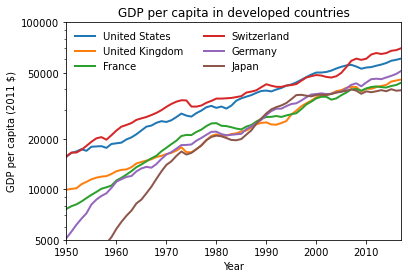

In [208]:
# Plot of GDP per capita of selected developed countries

(pwt.loc['United States']['rgdpe']/pwt.loc['United States']['pop']).plot(lw=2, label='United States')
(pwt.loc['United Kingdom']['rgdpe']/pwt.loc['United Kingdom']['pop']).plot(lw=2, label='United Kingdom')
(pwt.loc['France']['rgdpe']/pwt.loc['France']['pop']).plot(lw=2, label='France')
(pwt.loc['Switzerland']['rgdpe']/pwt.loc['Switzerland']['pop']).plot(lw=2, label='Switzerland')
(pwt.loc['Germany']['rgdpe']/pwt.loc['Germany']['pop']).plot(lw=2, label='Germany')
(pwt.loc['Japan']['rgdpe']/pwt.loc['Japan']['pop']).plot(lw=2, label='Japan')

plt.xlim(1950, 2017)

plt.yscale('log')
plt.ylim(5000, 10000)

plt.yticks([5000, 10000, 20000, 50000, 100000],
           [5000, 10000, 20000, 50000, 100000])

plt.legend(frameon=False, ncol=2)

plt.title('GDP per capita in developed countries')
plt.xlabel('Year')
plt.ylabel('GDP per capita (2011 \$)')

plt.show()

### Balanced growth path

Consider the fundamental equation of a one-sector closed economy:

\begin{align}
K_{t+1} = I_{t} + \left( 1-\delta \right) K_{t}
\end{align}

And rewrite it in difference form:

\begin{align}
\Delta K_{t+1} \equiv K_{t+1} - K_{t} = I_{t} - \delta K_{t} = Y_{t}-C_{t}-\delta K_{t}
\end{align}

It turns out that this equation generates a lot of interesting results.

**Definition: balanced growth path (BGP)**

A balanced growth path is a path $\left\{ Y_{t},K_{t},C_{t}\right\} _{t=0}^{\infty}$ along which the quantities $Y_{t}$, $K_{t}$ and $C_{t}$ are positive and grow at constant (possibly 0) rates, which we denote $g_{Y}$, $g_{K}$ and $g_{C}$, respectively.

**Proposition: equivalence of balanced growth and constancy of key ratios**

Let $\left\{ Y_{t},K_{t},C_{t}\right\} _{t=0}^{\infty}$ be a path along which $Y_{t}$, $K_{t}$, $C_{t}$ and $I_{t}=Y_{t}-C_{t}$
are positive for all $t\geq0$. Then, given the capital accumulation equation, the following holds:

(1) If there is balanced growth, then $g_{Y}=g_{K}=g_{C}=g_{I}$ and the ratios $K/Y$, $C/Y$ and $I/Y$ are constant.

(2) If $K/Y$ and $C/Y$ are constant, then $Y$, $K$, $C$ and $I$ all grow at the same constant rate, i.e. there is not only balanced growth, but balanced growth where $g_{Y}=g_{K}=g_{C}=g_{I}$.

**Proof of (1)**

Consider an economy on a balanced growth path. Then, by definition, $g_{Y}$, $g_{K}$ and $g_{C}$ are constant. If we use the capital accumulation equation, we get the result that $g_{I}=g_{K}$:

\begin{align}
\Delta K_{t+1} & =I_{t}-\delta K_{t}\quad|\quad:K_{t}\\
g_{K}\equiv\frac{\Delta K_{t+1}}{K_{t}} & =\frac{I_{t}}{K_{t}}-\delta\\
\frac{I_{t}}{K_{t}} & =g_{K}+\delta
\end{align}

Since the right hand side of the above equation is constant, then the $I/K$ ratio is constant and that means that the rates of growth of $I$ and $K$ have to be identical.

Focus now on the national accounting relationship:

\begin{align}
Y_{t} = C_{t} + I_{t} \quad \to \quad \Delta Y_{t+1} = \Delta C_{t+1} + \Delta I_{t+1}
\end{align}

\begin{align}
g_{Y} & \equiv \frac{\Delta Y_{t+1}}{Y_{t}} = \frac{\Delta C_{t+1}}{Y_{t}} + \frac{\Delta I_{t+1}}{Y_{t}} =
\frac{\Delta C_{t+1}}{C_{t}} \cdot \frac{C_{t}}{Y_{t}} + \frac{\Delta I_{t+1}}{I_{t}} \cdot \frac{I_{t}}{Y_{t}} \\
g_{Y} & =g_{C}\frac{C_{t}}{Y_{t}} + g_{I}\frac{Y_{t}-C_{t}}{Y_{t}} = \frac{C_{t}}{Y_{t}}\left(g_{C}-g_{I}\right)+g_{I}\\
g_{Y} & =\frac{C_{t}}{Y_{t}}\left(g_{C}-g_{K}\right)+g_{K}
\end{align}

where in the last line the equality between growth rates of $I$ and $K$ was used.

We have now two possibilities: either $g_{C}=g_{K}$ (and in consequence $g_{Y}=g_{K}$) or $g_{C} \neq g_{K}$.

Let us assume that $g_{C} \neq g_{K}$. Then we can rewrite the above expression as:

\begin{align}
\frac{C_{t}}{Y_{t}}=\frac{g_{Y}-g_{K}}{g_{C}-g_{K}}
\end{align}

The right hand side contains only growth rates, which are constant by the definition of the BGP. That means that the $C/Y$ ratio is constant as well, and $g_{C}=g_{Y}$. But this implies that the right hand side is equal to 1 and $C_{t}=Y_{t}$, which contradicts our assumption that $I_{t}=Y_{t}-C_{t}$ is positive.

That means that the assumption $g_{C} \neq g_{K}$ was wrong and $g_{C}=g_{K}$. This also implies that $g_{Y}=g_{K}=g_{I}=g_{C}$.

**Proof of (2)**

Suppose that $K/Y$ and $C/Y$ are constant. Then $g_{Y}=g_{K}=g_{C}$ and as a consequence ($I/Y=1-C/Y$) $g_{Y}=g_{I}=g_{K}$. Now we need to show that the growth rates are also constant. To that end we use the capital accumulation equation:

\begin{align}
\Delta K_{t+1} & =I_{t}-\delta K_{t}\quad|\quad:K_{t}\\
g_{K} & =\frac{I_{t}}{K_{t}}-\delta
\end{align}

Since $g_{I}=g_{K}$ then $I/K$ is constant and in consequence $g_{K}$ and all other key growth rates are constant.

Note that (1) means that any economy on a balanced growth path has to generate constant key ratios. (2) ensures that if we observe constant ratios, the economy is on a balanced growth path.

Let us now check whether the United States economy is on its balanced growth path.

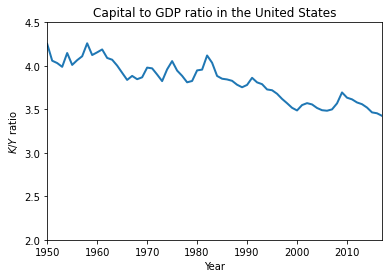

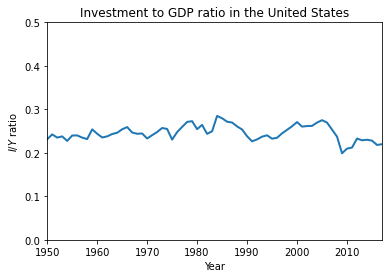

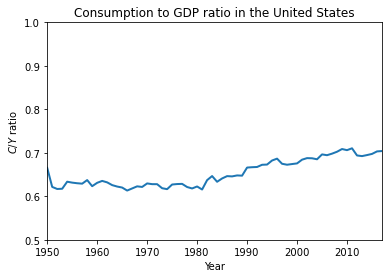

In [209]:
# Capital to GDP ratio in the United States
(pwt.loc['United States']['cn']/pwt.loc['United States']['cgdpo']).plot(lw=2)

plt.xlim(1950, 2017)
plt.ylim(2, 4.5)

plt.title('Capital to GDP ratio in the United States')
plt.xlabel('Year')
plt.ylabel('$K/Y$ ratio')

plt.show()

# Investment to GDP ratio in the United States
pwt.loc['United States']['csh_i'].plot(lw=2)

plt.xlim(1950, 2017)
plt.ylim(0, 0.5)

plt.title('Investment to GDP ratio in the United States')
plt.xlabel('Year')
plt.ylabel('$I/Y$ ratio')

plt.show()

# Consumption to GDP ratio in the United States
pwt.loc['United States']['csh_c'].plot(lw=2)

plt.xlim(1950, 2017)
plt.ylim(0.5, 1)

plt.title('Consumption to GDP ratio in the United States')
plt.xlabel('Year')
plt.ylabel('$C/Y$ ratio')

plt.show()

In the United States, both the $K/Y$ and $I/Y$ ratios were stable since 1950, but the $C/Y$ ratio exhibits since the 1980s an increasing trend, probably linked with an increasing trade deficit.

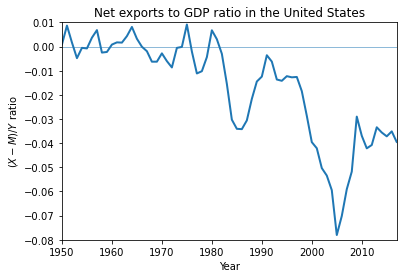

In [210]:
# Net exports to GDP ratio in the United States
(pwt.loc['United States']['csh_x']+pwt.loc['United States']['csh_m']+pwt.loc['United States']['csh_r']).plot(lw=2)
plt.hlines(0, 1950, 2017, lw=0.5)

plt.xlim(1950, 2017)

plt.title('Net exports to GDP ratio in the United States')
plt.xlabel('Year')
plt.ylabel('$(X-M)/Y$ ratio')

plt.show()

### Technological progress

There are at least three possibilities in how technological progress might manifest itself in our production function. Let $\tilde{F}$ denote the "true" production function and $\tilde{A}$ the "true" form of technological progress:

- Hicks-neutral: technology acts as a multiplicative constant: $\tilde{F}\left(K_{t},L_{t},\tilde{A}_{t}\right)=A_{t}\cdot F\left(K_{t},L_{t}\right)$

- Solow-neutral: technology increases productivity of capital: $\tilde{F}\left(K_{t},L_{t},\tilde{A}_{t}\right)=F\left(A_{t}\cdot K_{t},L_{t}\right)$

- Harrod-neutral: technology increases productivity of labor: $\tilde{F}\left(K_{t},L_{t},\tilde{A}_{t}\right)=F\left(K_{t},A_{t}\cdot L_{t}\right)$

Obviously the technological progress might manifest itself as a combination of the above possibilities: $\tilde{F}\left(K_{t},L_{t},\tilde{A}_{t}\right)=A_{F,t}\cdot F\left(A_{K,t}\cdot K_{t},A_{L,t}\cdot L_{t}\right)$

Despite all of the above forms seem ex ante plausible, balanced growth requires that the "true" production function has a representation of the Harrod-neutral form. Note that it does not mean that literally all technological progress directly increases labor productivity, just that the "true" production function can be rewritten in the required functional form.

**Theorem: [Uzawa's (1961)](http://www.jstor.org/stable/2295709) balanced growth path theorem**

Let $\left\{ Y_{t},K_{t},C_{t}\right\} _{t=0}^{\infty}$, where $0<C_{t}<Y_{t}$ for all $t\geq0$ be a path satisfying the capital accumulation equation. Suppose also that $\tilde{F}\left(K_{t},L_{t},\tilde{A}_{t}\right)$ exhibits constant returns to scale in $K$ and $L$ and worker population grows at a rate $n$ such that $L_{t}=L_{0}\cdot\exp\left(n \cdot t\right)$.

Then a necessary condition for this path to be a balanced growth path is that along the path it holds that:

\begin{align}
Y_{t}=\tilde{F}\left(K_{t},L_{t},\tilde{A}_{t}\right)=F\left(K_{t},A_{t}\cdot L_{t}\right)
\end{align}

where $A_{t}=\exp\left(g \cdot t\right)$ with $g \equiv g_{Y}-n$.

**Proof**

Suppose the path $\left\{ Y_{t},K_{t},C_{t}\right\} _{t=0}^{\infty}$ is a balanced growth path. Then $g_{Y}$ and $g_{K}$ are
equal and constant. As a consequence, we can write $Y_{t}=Y_{0}\cdot\exp\left(g_{Y}\cdot t\right)$ and $K_{t}=K_{0}\cdot\exp\left(g_{K}\cdot t\right)$. We then have:

\begin{align}
Y_{t}\cdot e^{-g_{Y}t}=Y_{0}=\tilde{F}\left(K_{0},L_{0},\tilde{A}_{0}\right)=\tilde{F}\left(K_{t}\cdot e^{-g_{K}t},L_{t}\cdot e^{-nt},\tilde{A}_{0}\right)
\end{align}

Because $g_{Y}=g_{K}$ and the function $\tilde{F}$ satifies constant returns to scale, we can rewrite the above equation as:

\begin{align}
Y_{t}=\tilde{F}\left(K_{t}\cdot e^{-g_{K}t}\cdot e^{g_{Y}t},L_{t}\cdot e^{-nt}\cdot e^{g_{Y}t},\tilde{A}_{0}\right)=\tilde{F}\left(K_{t},L_{t}\cdot e^{\left(g_{Y}-n\right)t},\tilde{A}_{0}\right)
\end{align}

Note that in the above formulation $\tilde{A}$ is reduced to a constant $\tilde{A}_{0}$. Therefore, there exists a function $F\left(K,L\right)$ such that:

\begin{align}
Y_{t}=F\left(K_{t},L_{t}\cdot e^{\left(g_{Y}-n\right)t}\right)
\end{align}

which we can rewrite as

\begin{align}
Y_{t}=F\left(K_{t},A_{t}\cdot L_{t}\right)
\end{align}

where $A_{t}=\exp\left[\left(g_{Y}-n\right) t\right]$ and $g=g_{Y}-n$ is the rate of "rewritten" technology growth.

### Solow-Swan model with technological improvements

Accordingly, we will now assume that the production function has the following form:

\begin{align}
Y_{t} = F \left( K_{t}, A_{t} L_{t} \right)
\end{align}

And that technology $A$ improves at a constant rate $g$:

\begin{align}
\frac{A_{t+1}}{A_{t}} = 1+g
\end{align}

Define output per effective labor $\hat{y}$ and capital per effective labor $\hat{k}$:

\begin{align}
\hat{y}_{t} \equiv \frac{Y_{t}}{A_{t} L_{t}} \quad \text{and} \quad \hat{k}_{t} \equiv \frac{K_{t}}{A_{t} L_{t}}
\end{align}

Again use the constant returns to scale property of the neoclassical production function:

\begin{align}
\hat{y}_{t} = \frac{Y_{t}}{A_{t} L_{t}} = \frac{1}{A_{t} L_{t}} \cdot F \left( K_{t}, A_{t} L_{t} \right) = 
F \left( \frac{1}{A_{t} L_{t}} \cdot K_{t}, \frac{1}{A_{t} L_{t}} \cdot A_{t} L_{t} \right) = 
F \left( \hat{k}_{t}, 1 \right) \equiv f \left( \hat{k}_{t} \right)
\end{align}

where now $f$ denotes the production function per effective labor.


Recall the fundamental equation of the model:

\begin{align}
K_{t+1} = s F \left( K_{t}, A_{t} L_{t} \right) + \left( 1-\delta \right) K_{t}
\end{align}

Express it in terms of variables per effective labor:

\begin{align}
K_{t+1} &= s F \left( K_{t}, A_{t} L_{t} \right) + \left( 1-\delta \right) K_{t} \qquad | \quad : A_{t} L_{t} \\
\frac{K_{t+1}}{A_{t} L_{t}} &= s \frac{F \left( K_{t}, A_{t} L_{t} \right)}{A_{t} L_{t}} 
+ \left( 1-\delta \right) \frac{K_{t}}{A_{t} L_{t}} \\
\frac{L_{t+1}}{L_{t}} \cdot \frac{A_{t+1}}{A_{t}} \cdot \frac{K_{t+1}}{A_{t+1} L_{t+1}}  &= s f \left( \hat{k}_{t} \right) 
+ \left( 1-\delta \right) \hat{k}_{t} \\
\left( 1+n \right) \left( 1+g \right) \hat{k}_{t+1}  &= s f \left( \hat{k}_{t} \right) 
+ \left( 1-\delta \right) \hat{k}_{t}
\end{align}

As before, we can find the steady state level of capital per effective labor, assuming a Cobb-Douglas production function:

\begin{align}
F \left( K, AL \right) = K^{\alpha} \left( AL \right)^{1-\alpha} \quad \to \quad 
f \left( \hat{k} \right) = \hat{k}^{\alpha}
\end{align}

\begin{align}
\left( 1+n+g+ng \right) \hat{k}_{t+1} &= s f \left( \hat{k}_{t} \right) + \left( 1-\delta \right) \hat{k}_{t} \\
\left( 1+n+g+ng \right) \hat{k}^{*} &= s \left( \hat{k}^{*} \right)^{\alpha} + \left( 1-\delta \right) \hat{ss}_{t} \\
\left( \delta+n+g+ng \right) \hat{k}^{*} &= s \left( \hat{k}^{*} \right)^{\alpha} \\
\left( \hat{k}^{*} \right)^{1-\alpha} &= \frac{s}{\delta+n+g+ng} \\
\hat{k}^{*} &= \left( \frac{s}{\delta+n+g+ng} \right)^{1/(1-\alpha)} \\
\hat{k}^{*} &\approx \left( \frac{s}{\delta+n+g} \right)^{1/(1-\alpha)}
\end{align}

Where the approximation above utilizes the fact that the product of $n$ and $g$ is very small.

### GDP per worker along the Balanced Growth Path

In the case of positive rate of technologial improvements, even if capital per effective labor converges to the steady state,  output per worker continues to grow (at a rate $g$):

\begin{align}
y_{t} = \frac{Y_{t}}{L_{t}} = A_{t} \cdot \frac{Y_{t}}{A_{t} L_{t}} = A_{t} \cdot \hat{y}_{t} = 
A_{t} \cdot f \left( \hat{k}_{t} \right)
\end{align}

\begin{align}
\frac{\Delta y_{t+1}}{y_{t}} = 
\frac{A_{t+1} \cdot f \left( \hat{k}_{t+1} \right) - A_{t} \cdot f \left( \hat{k}_{t} \right)}
{A_{t} \cdot f \left( \hat{k}_{t} \right)} =
\frac{A_{t+1}}{A_{t}} \cdot \frac{f \left( \hat{k}_{t+1} \right)}{f \left( \hat{k}_{t} \right)} - 1
\end{align}

So along the balanced growth path when $\hat{k}_{t+1} = \hat{k}_{t} = \hat{k}^{*}$:

\begin{align}
g_{y}^{*} = \frac{\Delta y_{t+1}^{*}}{y_{t}^{*}} = \frac{A_{t+1}}{A_{t}} \cdot \frac{f \left( \hat{k}^{*} \right)}{f \left( \hat{k}^{*} \right)} - 1 = \left( 1 + g \right) \cdot 1 - 1 = g
\end{align}

And the value of output per worker along the balanced growth path is equal to:

\begin{align}
y_{t}^{*} = A_{t} \cdot \left( \frac{s}{\delta+n+g} \right)^{\alpha/(1-\alpha)}
\end{align}

If we take the logarithms of the above equation, we get:

\begin{align}
\log y_{t}^{*} &= \log \left( A_{0} \cdot \left( 1+g \right)^{t} \right) + \frac{\alpha}{1-\alpha} \log s 
- \frac{\alpha}{1-\alpha} \log \left( \delta+n+g \right) \\
\log y_{t}^{*} &= \log A_{0} + t \cdot \log \left( 1+g \right) + \frac{\alpha}{1-\alpha} \log s 
- \frac{\alpha}{1-\alpha} \log \left( \delta+n+g \right)
\end{align}

The above equation can be rewritten as an empirical model for a regression:

\begin{align}
\log y_{t} &= a_{0} + a_{1} \log s + a_{2} \log \left( \delta+n+g \right) + \epsilon
\end{align}

where $a_{0}$ is a constant and $\epsilon$ is a country-specific shock to initial technology and the distance from the balanced growth path.

Additionally, one can run a restricted regression:

\begin{align}
\log y_{t} &= a_{0} + a_{1} \left[ \log s - \log \left( \delta+n+g \right) \right] + \epsilon
\end{align}

where:

\begin{align}
a_{1} = -a_{2} = \frac{\alpha}{1-\alpha}
\end{align}

This is the first empirical exercise in [Mankiw, Romer and Weil (1992)](http://www.jstor.org/stable/2118477), which we will replicate below.

In [211]:
# Read in Mankiw, Romer and Weil (1992) data
mrw = pd.read_stata('data/MRW1992.dta')
mrw_countries = mrw['country']
mrw.head()

,country,N,I,O,Y60,Y85,Y_growth,pop_growth,invest,school
0,Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.100000,4.5
1,Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.800000,1.8
2,Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.800000,1.8
3,Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.299999,2.9
4,Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.700000,0.4


In [212]:
# Prepare variables for regression
mrw['y_85'] = np.log(mrw['Y85'])
mrw['s'] = np.log(mrw['invest']/100)
mrw['δ_n_g'] = np.log(0.05+mrw['pop_growth']/100)
mrw['restricted'] = mrw['s'] - mrw['δ_n_g']

In [213]:
# Run regression on the non-oil countries sample
mrw_N = mrw[mrw['N']==1]
print('\t Non-oil countries')
mrw_results = smf.ols('y_85 ~ s + δ_n_g', data=mrw_N).fit()
print(mrw_results.summary())

	 Non-oil countries
                            OLS Regression Results                            
Dep. Variable:                   y_85   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     71.51
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.13e-19
Time:                        17:47:33   Log-Likelihood:                -101.04
No. Observations:                  98   AIC:                             208.1
Df Residuals:                      95   BIC:                             215.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4299      1.584

In [214]:
# Run restricted regression on the non-oil countries sample
print('\t Restricted regression')
print('\t Non-oil countries')
mrw_results_restricted = smf.ols('y_85 ~ restricted', data=mrw_N).fit()
print(mrw_results_restricted.summary())
print('')
print('Implied α =', mrw_results_restricted.params[1]/(1+mrw_results_restricted.params[1]))
print('')
print('Test of restriction p-value =', mrw_results.compare_f_test(mrw_results_restricted)[1])

	 Restricted regression
	 Non-oil countries
                            OLS Regression Results                            
Dep. Variable:                   y_85   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.13e-20
Time:                        17:47:33   Log-Likelihood:                -101.46
No. Observations:                  98   AIC:                             206.9
Df Residuals:                      96   BIC:                             212.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

So it seems that our empirical model is quite successful, as it is able to explain around 60% of total variation in GDP per worker across countries with the observables suggested by the theory.

There is however a problem: implied level of $\alpha$ is well above $0.5$, whereas economists usually think that $\alpha \in [0.3, 0.4]$.

Let us turn back to theory and see whether we can construct a way to recover $\alpha$ from other data.

### Firms' profit maximization problem

Firms choose employment $L$ and rent such levels of capital $K$ which maximizes their profits:

\begin{align}
\max_{K, L} \quad & \Pi = Y - w L - r^{k} K \\
\text{subject to} \quad & Y = K^{\alpha} \left( AL \right)^{1-\alpha}
\end{align}

where $w$ is real wage and $r^{k}$ is the rental rate of capital. Rewrite the problem:

\begin{align}
\max_{K, L} \quad & \Pi = K^{\alpha} \left( AL \right)^{1-\alpha} - w L - r^{k} K
\end{align}

Derive the first order conditions:

\begin{align}
\frac{\partial \Pi}{\partial K} &= \alpha K^{\alpha-1} \left( AL \right)^{1-\alpha} - r^{k} = 0
\quad \quad \,\,\,\, \to \quad r^{k} = \alpha \frac{Y}{K} \\
\frac{\partial \Pi}{\partial L} &= \left( 1-\alpha \right) K^{\alpha} A^{1-\alpha} L^{-\alpha} - w = 0
\quad \to \quad w = \left( 1-\alpha \right) \frac{Y}{L}
\end{align}

Now take a look at the share of labor income in GDP:

\begin{align}
\frac{wL}{Y} = \frac{\left( 1-\alpha \right) \dfrac{Y}{L} \cdot L}{Y} = 1-\alpha
\end{align}

We can see that we can recover the value of $\alpha$ via the following formula:

\begin{align}
\alpha = 1 - \frac{wL}{Y}
\end{align}

In [215]:
pwt.loc['United States']['labsh']

year
1950    0.628363
1951    0.633732
1952    0.644852
1953    0.644496
1954    0.637052
          ...   
2015    0.595646
2016    0.593773
2017    0.596151
2018    0.594326
2019    0.597091
Name: labsh, Length: 70, dtype: float32

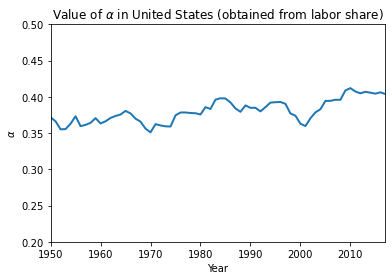

In [216]:
(1-pwt.loc['United States']['labsh']).plot(lw=2)

plt.xlim(1950, 2017)
plt.ylim(0.2, 0.5)

plt.title(r'Value of $\alpha$ in United States (obtained from labor share)')
plt.xlabel('Year')
plt.ylabel(r'$\alpha$')

plt.show()

Therefore, MRW consider the following modification of the Solow-Swan model:

- Production function:

\begin{align}
Y = K^{\alpha} H^{\beta} \left( AL \right)^{1-\alpha-\beta}
\end{align}

where $H$ denotes the stock of human capital.

- Balanced growth path level of GDP per worker:

\begin{align}
\log y_{t}^{*} = \log A_{0} + t \cdot \log \left( 1+g \right) - \frac{\alpha+\beta}{1-\alpha-\beta} \log \left( \delta+n+g \right)
+ \frac{\alpha}{1-\alpha-\beta} \log s_{k} + \frac{\beta}{1-\alpha-\beta} \log s_{h}
\end{align}

where $s_{k}$ and $s_{h}$ denote saving/investment rates in physical and human capital

In [217]:
# Add in log of s_h
mrw['s_h'] = np.log(mrw['school'])

# Run regression on the non-oil countries sample
print('\t Non-oil countries')
mrw_h_results = smf.ols('y_85 ~ s + δ_n_g + s_h', data=mrw[mrw['N']==1]).fit()
print(mrw_h_results.summary())

	 Non-oil countries
                            OLS Regression Results                            
Dep. Variable:                   y_85   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.54e-31
Time:                        17:47:33   Log-Likelihood:                -70.576
No. Observations:                  98   AIC:                             149.2
Df Residuals:                      94   BIC:                             159.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8305      1.180

In [218]:
mrw['restricted']

0      1.154064
1     -0.202237
2      0.378066
3      1.238728
4      0.766650
         ...   
116    1.504077
117         NaN
118    0.700367
119    1.211408
120    0.824916
Name: restricted, Length: 121, dtype: float32

In [219]:
# Add in restrictions
mrw['restricted_h'] = mrw['s_h'] - mrw['δ_n_g']
mrw_N = mrw[mrw['N']==1]

# Run restricted regression on the non-oil countries sample
print('\t Restricted regression')
print('\t Non-oil countries')
mrw_h_results_restricted = smf.ols('y_85 ~ restricted + restricted_h', data=mrw_N).fit()
print(mrw_h_results_restricted.summary())

α_β = ((mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2])/
       (1+mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2]))

print('')
print('Implied α =', mrw_h_results_restricted.params[1] * (1-α_β))
print('Implied β =', mrw_h_results_restricted.params[2] * (1-α_β))
print('')
print('Test of restriction p-value =', mrw_h_results.compare_f_test(mrw_h_results_restricted)[1])

	 Restricted regression
	 Non-oil countries
                            OLS Regression Results                            
Dep. Variable:                   y_85   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.47e-32
Time:                        17:47:33   Log-Likelihood:                -70.963
No. Observations:                  98   AIC:                             147.9
Df Residuals:                      95   BIC:                             155.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Inte

And as you can see, the modification places the value of $\alpha$ back in the range of plausible values. 

Moreover, the model can now explain around 78% of total variation of GDP per capita across countries.


### Convergence
The model can also be used to evaluate the speed of convergence across countries. While deriving the formula is quite tedious, the end result is quite straightforward:

\begin{align}
\frac{\Delta y_{t+1}}{y_{t}} \approx \underbrace{ \left( \delta+n+g \right) \left( 1-\alpha-\beta \right) }_{\lambda} 
\cdot [\log y_{t}^{*} - \log y_{t}]
\end{align}

The above formula implies that the growth rate of GDP per worker in a country is a positive function of its distance to its balanced growth path level. The value of $\lambda$ dictates how fast a country converges. For example, if $\lambda=0.02$ then a country closes half of the distance between the initial and BGP level of GDP in around 35 years.

The equation can be rewritten into a form that is easy to run a regression on:

\begin{align}
\log y_{t} - \log y_{0} = \left( 1-e^{-\lambda t} \right) \left[ \frac{\alpha}{1-\alpha-\beta} \log s_{k}
+ \frac{\beta}{1-\alpha-\beta} \log s_{h}
- \frac{\alpha+\beta}{1-\alpha-\beta} \log \left( \delta+n+g \right)
- \log y_{0} \right]
\end{align}

where $\log y_{0}$ denotes an initial level of GDP per worker.

In [220]:
# Add in log of initial GDP per worker
mrw['y_60'] = np.log(mrw['Y60'])

# Add in log-difference of levels of GDP per worker
mrw['y_85_60'] = mrw['y_85'] - mrw['y_60']

mrw_N = mrw[mrw['N']==1]

# Run regressions
print('\t Non-oil countries')
mrw_results_N = smf.ols('y_85_60 ~ y_60 + s + δ_n_g + s_h', data=mrw_N).fit()
print(mrw_results_N.summary())
print('')
print('Implied λ =', np.log(1+mrw_results_N.params[1])/(-25))

print('')
print('\t Intermediate countries')
mrw_results_I = smf.ols('y_85_60 ~ y_60 + s + δ_n_g + s_h', data=mrw[mrw['I']==1]).fit()
print(mrw_results_I.summary())
print('')
print('Implied λ =', np.log(1+mrw_results_I.params[1])/(-25))


print('')
print('\t OECD countries')
mrw_results_O = smf.ols('y_85_60 ~ y_60 + s + δ_n_g + s_h', data=mrw[mrw['O']==1]).fit()
print(mrw_results_O.summary())
print('')
print('Implied λ =', np.log(1+mrw_results_O.params[1])/(-25))

	 Non-oil countries
                            OLS Regression Results                            
Dep. Variable:                y_85_60   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     21.94
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           8.99e-13
Time:                        17:47:33   Log-Likelihood:                -26.952
No. Observations:                  98   AIC:                             63.90
Df Residuals:                      93   BIC:                             76.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9572      0.777

For the developed countries, the theoretical model would predict that $\lambda \approx 0.02$ since $\delta+n+g \approx 0.06$ and $1-\alpha-\beta \approx 0.33$. This is exactly the value implied by the regression for the OECD countries.

In the plots below we can see that while there is no unconditional convergence, as poorer countries do not consistently grow faster than richer countries, once we control for observables impacting the steady states of the economies, convergence is evident.

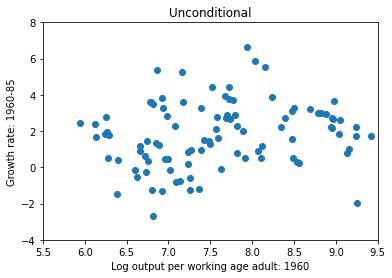

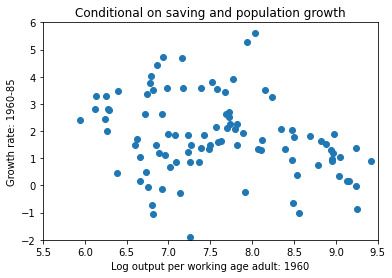

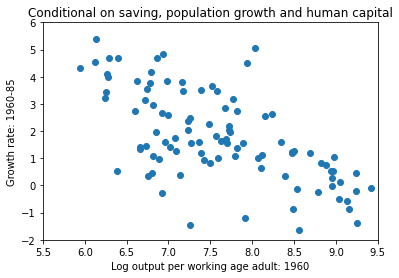

In [221]:
# Convergence plots

par = mrw_results_N.params

# plt.scatter(mrw_N['y_60'], 100*((mrw_N['Y85']/mrw_N['Y60'])**(1/25)-1))
plt.scatter(mrw_N['y_60'], 100*mrw_N['y_85_60']/25)

plt.title('Unconditional')
plt.xlabel('Log output per working age adult: 1960')
plt.ylabel('Growth rate: 1960-85')

plt.show()

###
plt.scatter(mrw_N['y_60'], 
            100/25*(mrw_N['y_85_60']
                    -par[2]*(mrw_N['s']-mrw_N['s'].mean())
                    -par[3]*(mrw_N['δ_n_g']-mrw_N['δ_n_g'].mean())))

plt.title('Conditional on saving and population growth')
plt.xlabel('Log output per working age adult: 1960')
plt.ylabel('Growth rate: 1960-85')

plt.show()

###
plt.scatter(mrw_N['y_60'], 
            100/25*(mrw_N['y_85_60']
                    -par[2]*(mrw_N['s']-mrw_N['s'].mean())
                    -par[3]*(mrw_N['δ_n_g']-mrw_N['δ_n_g'].mean())
                    -par[4]*(mrw_N['s_h']-mrw_N['s_h'].mean())))

plt.title('Conditional on saving, population growth and human capital')
plt.xlabel('Log output per working age adult: 1960')
plt.ylabel('Growth rate: 1960-85')

plt.show()

### Homework: replication of MRW results using PWT 10.0

In [222]:
# Construct replication dataset

# First detect countries from MRW that are absent in PWT
not_found = []

for i, country in enumerate(mrw_countries[mrw['N']==1]):
    try:
        temp = np.log(np.mean(pwt.loc[country]['csh_i']))
    except:
        not_found.append(country)

print(not_found)

['CentralAfr. Rep.', 'Congo, Peop. Rep.', 'Ivory Cost', 'Somalia', 'S. Africa', 'Tanzania', 'Zaire', 'Burma', 'Hong Kong', 'Korea, Rep. of', 'Syrian Arab Rep.', 'Germany, Fed. Rep.', 'Dominican Rep.', 'Trinidad & Tobago', 'Bolivia', 'Venezuela', 'Papua New Guinea']


In [223]:
# Construct a list of PWT-compatible country names (but still some countries are not covered by PWT)
not_found_PWT = ['Central African Republic', 'Congo', "Côte d'Ivoire", 
                 'South Africa', 'U.R. of Tanzania: Mainland', 
                 'D.R. of the Congo', 'Myanmar', 'China, Hong Kong SAR', 
                 'Republic of Korea', 'Syrian Arab Republic', 'Germany', 
                 'Dominican Republic', 'Trinidad and Tobago', 
                 'Bolivia (Plurinational State of)', 'Venezuela (Bolivarian Republic of)']

In [224]:
mrw_pwt_countries = [n for n in mrw_countries[mrw['N']==1].tolist() if n not in not_found]
mrw_pwt_countries = mrw_pwt_countries + not_found_PWT

In [225]:
# Construct replication dataset based on observations for years 1985-2017
s = np.zeros(len(mrw_pwt_countries))
n = np.zeros(len(mrw_pwt_countries))
h = np.zeros(len(mrw_pwt_countries))
y_85 = np.zeros(len(mrw_pwt_countries))
y_17 = np.zeros(len(mrw_pwt_countries))

for i, country in enumerate(mrw_pwt_countries):
    s[i] = np.log(np.mean(pwt.loc[country]['csh_i'][35:]))
    n[i] = np.log(0.05+np.mean(pwt.loc[country]['emp'][35:].pct_change()))
    h[i] = np.mean(pwt.loc[country]['hc'][35:])
    y_85[i] = np.log(pwt.loc[country, 1985]['rgdpo']/pwt.loc[country, 1985]['emp'])
    y_17[i] = np.log(pwt.loc[country, 2017]['rgdpo']/pwt.loc[country, 2017]['emp'])

d = {'y_17': y_17, 'y_85': y_85, 's': s, 'δ_n_g': n, 's_h': np.log(np.log(h)*10)}
mrw_rep = pd.DataFrame(data=d, index=mrw_pwt_countries)
mrw_rep['y_17_85'] = mrw_rep['y_17'] - mrw_rep['y_85']
mrw_rep.head()

,y_17,y_85,s,δ_n_g,s_h,y_17_85
Algeria,10.673525,11.235086,-1.145871,-2.514745,1.838571,-0.561562
Angola,9.602782,8.652294,-1.065619,-2.503920,0.974068,0.950488
Benin,9.050662,8.656473,-1.878282,-2.508623,1.342471,0.394189
Botswana,10.601112,9.596834,-1.302101,-2.517723,2.186768,1.004278
Burkina Faso,8.637341,7.842568,-1.847810,-2.640430,0.072918,0.794774


**Task 1**: run an unrestricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable and `s`, `δ_n_g` and `s_h` as independent variables.
Comment on the coefficient signs and explanatory power of the model.

**Task 2**: run a restricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable, and appropriate restrictions as independent variables.
Comment on the implied values of $\alpha$ and $\beta$.

**Task 3**: run a convergence estimation on the replication dataset of the human capital augmented Solow model, with `y_17_85` as the dependent variable and `y_85`, `s`, `δ_n_g` and `s_h` as independent variables.
Produce a conditional convergence plot.

In [226]:
# Homework Task 1
print('HOMEWORK TASK 1\nUnrestricted\n')
mrw_rep_results = smf.ols('y_17 ~ s + δ_n_g + s_h', data=mrw_rep).fit()
print(mrw_rep_results.summary())

HOMEWORK TASK 1
Unrestricted

                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     71.61
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           7.21e-24
Time:                        17:47:34   Log-Likelihood:                -95.617
No. Observations:                  95   AIC:                             199.2
Df Residuals:                      91   BIC:                             209.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2195 

As we can see here, the GDP per worker for the year 2017 is positively correlated with savings s and investment rate in human capital s_h and negatively with the number of 'δ_n_g', it is obvious that GDP per worker increases when savings s and investment rate in human capital s_h increases. If there is an increase in depreciation rate, increase in population growth then the GDP reduces. 

In [247]:
# Homework Task 2

mrw_rep['restricted'] = mrw_rep['s'] - mrw_rep['δ_n_g']
mrw_rep_res_1 = smf.ols('y_17 ~ restricted ', data = mrw_rep).fit()
α_β_res_1 = (mrw_rep_res_1.params[1]/(1+mrw_rep_res_1.params[1]))
print('only using restricted α=', mrw_rep_res_1.params[1] * (1-α_β_res_1))


mrw_rep['restricted'] = mrw_rep['s'] - mrw_rep['δ_n_g']
mrw_rep['restricted_h'] = mrw_rep['s_h'] - mrw_rep['δ_n_g']
print('\n\n\nHOMEWORK TASK 2')
mrw_rep_results_restricted = smf.ols('y_17 ~ restricted + restricted_h ', data = mrw_rep).fit()
print(mrw_rep_results_restricted.summary())

α_β_old = ((mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2])/
(1+mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2]))
α_β_new = ((mrw_rep_results_restricted.params[1]+mrw_rep_results_restricted.params[2])/
(1+mrw_rep_results_restricted.params[1]+mrw_rep_results_restricted.params[2]))

print('old α =', mrw_h_results_restricted.params[1] * (1-α_β_old))
print('old β =', mrw_h_results_restricted.params[2] * (1-α_β_old))
print('Implied α =', mrw_rep_results_restricted.params[1] * (1-α_β_new))
print('Implied β =', mrw_rep_results_restricted.params[2] * (1-α_β_new))
print('Test of restriction p-value =', mrw_rep_results.compare_f_test(mrw_rep_results_restricted)[1])

only using restricted α= 0.6777674774077055



HOMEWORK TASK 2
                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     108.5
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.34e-25
Time:                        18:03:20   Log-Likelihood:                -95.658
No. Observations:                  95   AIC:                             197.3
Df Residuals:                      92   BIC:                             205.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [244]:
print('\t HOMEWORK TASK 3')

mrw_rep['y_17_85'] = mrw_rep['y_17'] - mrw_rep['y_85']

mrw_rep_results = smf.ols('y_17_85 ~ y_85 + s + δ_n_g + s_h', data=mrw_rep).fit()
print(mrw_rep_results.summary())
print('')
print('Implied λ =', np.log(1+mrw_results_O.params[1])/(-32))

	 HOMEWORK TASK 3
                            OLS Regression Results                            
Dep. Variable:                y_17_85   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.639
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           0.000427
Time:                        18:00:15   Log-Likelihood:                -81.212
No. Observations:                  95   AIC:                             172.4
Df Residuals:                      90   BIC:                             185.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7581      1.464  

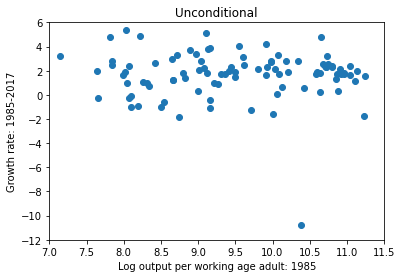

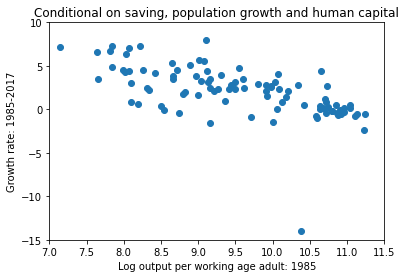

In [245]:
# Convergence plots

par = mrw_rep_results.params

# plt.scatter(mrw_rep['y_85'], 100*((mrw_rep['Y17']/mrw_rep['Y85'])**(1/32)-1))
plt.scatter(mrw_rep['y_85'], 100*mrw_rep['y_17_85']/32)

plt.title('Unconditional')
plt.xlabel('Log output per working age adult: 1985')
plt.ylabel('Growth rate: 1985-2017')

plt.show()

###
plt.scatter(mrw_rep['y_85'], 
            100/25*(mrw_rep['y_17_85']
                    -par[2]*(mrw_rep['s']-mrw_rep['s'].mean())
                    -par[3]*(mrw_rep['δ_n_g']-mrw_rep['δ_n_g'].mean())
                    -par[4]*(mrw_rep['s_h']-mrw_rep['s_h'].mean())))

plt.title('Conditional on saving, population growth and human capital')
plt.xlabel('Log output per working age adult: 1985')
plt.ylabel('Growth rate: 1985-2017')

plt.show()

## Optional - Analysis of Saving Rate

In [231]:
def k_star(s=0.2, δ=0.05, n=0.01, g=0.02, α=1/3):
    return (s/(δ+n+g+n*g))**(1/(1-α))

def f(k, α=1/3):
    return k**α

In [232]:
def c_star(s=0.2, δ=0.05, n=0.01, g=0.02, α=1/3):
    return (1-s)*f(k_star(s, δ, n, g, α), α)

def c_k(k, s=0.2, α=1/3):
    return (1-s)*f(k, α)

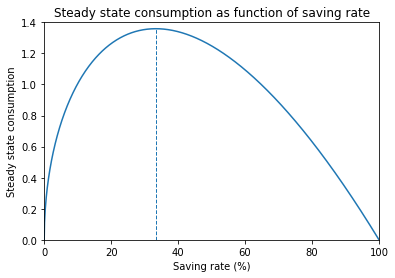

In [233]:
δ=0.05
n=0.01
g=0.02
α=1/3

ss = np.linspace(0, 1, 1000)

plt.plot(100*ss, c_star(ss, δ, n, g, α))
plt.vlines(100*α, 0, c_star(α, δ, n, g, α), lw=1, linestyle='--')

plt.title('Steady state consumption as function of saving rate')
plt.ylabel('Steady state consumption')
plt.xlabel('Saving rate (%)')

plt.show()

In [234]:
def k_next(k, s=0.2, δ=0.05, n=0.01, g=0.02, α=1/3):
    return (s*f(k, α)+(1-δ)*k)/((1+n)*(1+g))

Initial saving rate below golden rule saving rate


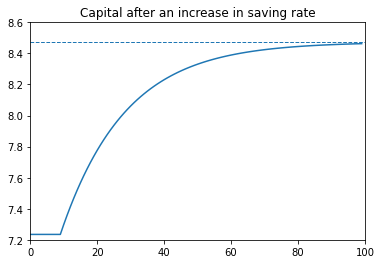

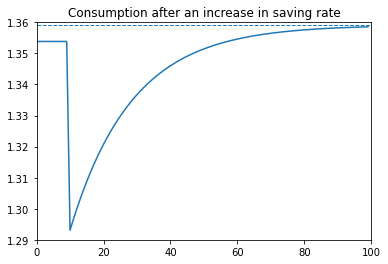

In [235]:
T = 100
k_t = np.zeros(T)
c_t = np.zeros(T)

print('Initial saving rate below golden rule saving rate')

s_old = 0.3
s_GR  = α

k_t[:10] = k_star(s=s_old)
c_t[:10] = c_k(k_t[:10], s=s_old)
for t in range(10, T):
    k_t[t] = k_next(k_t[t-1], s=s_GR)
    c_t[t] = c_k(k_t[t], s=s_GR)

plt.plot(k_t)
plt.hlines(k_star(s=s_GR), 0, T, lw=1, linestyle='--')
plt.title('Capital after an increase in saving rate')
plt.show()

plt.plot(c_t)
plt.hlines(c_star(s=s_GR), 0, T, lw=1, linestyle='--')
plt.title('Consumption after an increase in saving rate')
plt.show()

Initial saving rate above golden rule saving rate


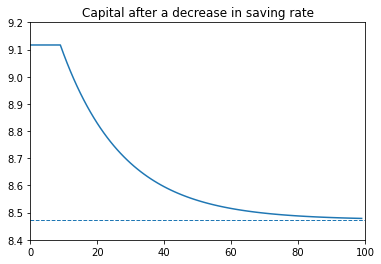

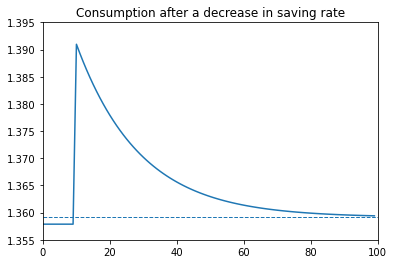

In [236]:
T = 100
k_t = np.zeros(T)
c_t = np.zeros(T)

print('Initial saving rate above golden rule saving rate')

s_old = 0.35
s_GR  = α

k_t[:10] = k_star(s=s_old)
c_t[:10] = c_k(k_t[:10], s=s_old)
for t in range(10, T):
    k_t[t] = k_next(k_t[t-1], s=s_GR)
    c_t[t] = c_k(k_t[t], s=s_GR)

plt.plot(k_t)
plt.hlines(k_star(s=s_GR), 0, T, lw=1, linestyle='--')
plt.title('Capital after a decrease in saving rate')
plt.show()

plt.plot(c_t)
plt.hlines(c_star(s=s_GR), 0, T, lw=1, linestyle='--')
plt.title('Consumption after a decrease in saving rate')
plt.show()

In [237]:
# Read dataset
pwt = pd.read_stata('data/pwt100.dta')

# Modify the dataset so that it is easier to work with

# Store country names and codes for later use
countries = pwt['country']
countries = countries.drop_duplicates()

countrycodes = pwt['countrycode']
countrycodes = countrycodes.drop_duplicates()

# Set MultiIndex
pwt.set_index(['countrycode', 'year'], inplace=True)

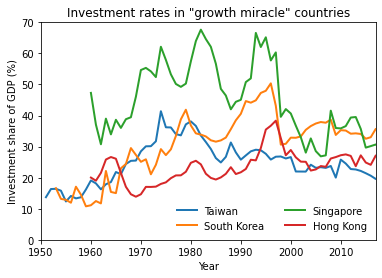

In [238]:
(100*pwt.loc['TWN']['csh_i']).plot(lw=2, label='Taiwan')
(100*pwt.loc['KOR']['csh_i']).plot(lw=2, label='South Korea')
(100*pwt.loc['SGP']['csh_i']).plot(lw=2, label='Singapore')
(100*pwt.loc['HKG']['csh_i']).plot(lw=2, label='Hong Kong')

plt.xlim(1950, 2017)
plt.ylim(0, 70)

plt.title('Investment rates in "growth miracle" countries')
plt.xlabel('Year')
plt.ylabel('Investment share of GDP (%)')

plt.legend(loc='lower right', ncol=2, frameon=False)

plt.show()